# A Tutorial on Comparative Analysis of Support Vector Machines and Neural Networks for Recommendation systems

In this notebook, we're going to build a **music recommendation system** using **Support Vector Machines (SVM)**, a popular machine learning model. Our goal is to predict whether a user will like a song based on its **audio features** like **danceability**, **energy**, **loudness**, and **tempo**.

You can easily adapt it to your own dataset and experiment with different models or features
Feel free to explore, modify, and play around with the code.

**Let’s get started!**

# SUPPORT VECTOR MACHINES

## Step 1: Import Necessary Libraries

The first step is always crucial: here, we're importing all the necessary libraries at once to avoid having to import them individually at each stage. Think of it like prepping your ingredients before starting to cook having everything ready and within reach so you don't waste time running around looking for things as you go along.


We are importing the necessary libraries for data manipulation (pandas, numpy), preprocessing (StandardScaler), model training (SVC for Support Vector Machine), and performance evaluation (accuracy_score). We also include libraries for visualization (matplotlib, seaborn) to display results clearly.

In [29]:
# import all neccessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2: Loading the Dataset

The dataset is provided in the Github repository as well, download it and use it so that we can go side by side, and you can learn more effectively. This dataset is publicly available in kaggle, use that. If you are not a great fan of music(I  really hope that you are), you can use a different dataset that you like, just make sure that everything is tailored to your dataset.

if you want to unzip the file, use the below code:

In [30]:
#unziping the dataset

import zipfile
zip_file_path = "/content/sample_data/dataset.csv.zip"
destination_folder = '.'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
   zip_ref.extractall(destination_folder)
print("Successfully completed", zip_ref.namelist())

Successfully completed ['dataset.csv']


In [32]:
#Read the data
df = pd.read_csv('dataset.csv')

# We create a new column 'user_preference' that will store whether the song is liked (1) or not liked (0).
df['user_preference'] = np.where(df['danceability'] > 0.7, 1, 0)

# Let's check the first 5 rows of the dataset to understand its structure. its always good to explore our dataset
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,user_preference
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0


here, we can see all the column names and this helps in further work around the data

**Exercise 1.** try and change the threshold of 7 to any other number you like, and see how it changes

## Step 3: Cleaning the Dataset

Here, we have dropped columns with null values

In [33]:
#drop columns with null values
df.isnull().sum()
df = df.dropna()

## Step 4: Feature Selection

Here, we define our feature columns (danceability, energy, loudness, and tempo) and extract the corresponding values into X. We also extract the user_preference values into y. Afterward, we standardize the features using StandardScaler to ensure all the features have the same scale (important for SVM).

In [34]:
#feature selection and scaling
features = ['danceability', 'energy', 'loudness', 'tempo']
X = df[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = df['user_preference'].values


## Step 4: Train-Test Split

We split the data into training (80%) and testing (20%) sets using train_test_split. This allows us to train the model on one subset of data and test its performance on another unseen subset. This step is crucial for evaluating the model's generalization ability.

In [35]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
X_train.shape, X_test.shape


((91199, 4), (22800, 4))

**Excercise 2:** You can have some fun by changing the ratio of train-test split and observe what happens

## Step 5: Train the SVM Model

Here, we initialize an SVM model with a linear kernel (kernel='linear'). After training, we use the model to predict the user_preference values and calculate the model’s accuracy by comparing the predicted values with the actual values.

In [36]:
# Train the SVM model with a linear kernel
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Predict the target values on the test set
y_pred = svm_model.predict(X_test)

# Let's check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


**Exercise 3:** okay, here comes the fun part, do you remember a picure of different kernel use in svm that we had in the tutorial, here is a chance to make that practical. What would happen if we used a different kernel, like 'rbf' (Radial Basis Function)? Try changing the kernel and see how the accuracy changes.


And for all the lazy people out there, who didnt actually go through the tutorial, and went straight to this jupyter notebook. Don't let the above code shows 100 percent accuracy fool you, its because the task is easy, and it wont always be 100 percent accurate.

## Step 6: Performance Evaluation

In this step, we evaluate the performance of our model by displaying a classification report (precision, recall, F1-score) and a confusion matrix, which visualizes the true positives, false positives, true negatives, and false negatives.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17336
           1       1.00      1.00      1.00      5464

    accuracy                           1.00     22800
   macro avg       1.00      1.00      1.00     22800
weighted avg       1.00      1.00      1.00     22800



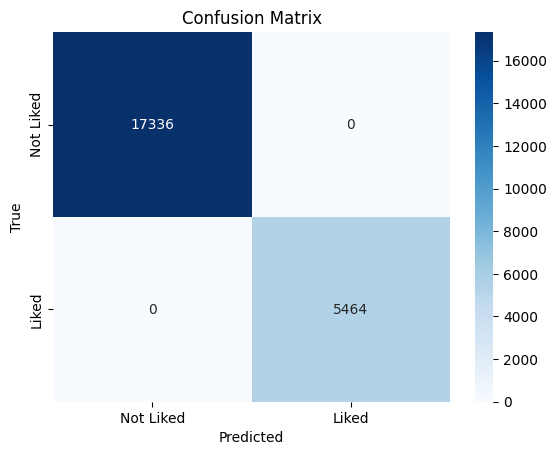

In [37]:
# Let's evaluate the model with a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Liked', 'Liked'], yticklabels=['Not Liked', 'Liked'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



## Step 7: Testing with New Data

Now we test our trained model by passing a new song's feature values (danceability, energy, loudness, and tempo). We scale the new data to match the scale of the training data and predict whether the model recommends the song or not.

In [38]:
# Let's test the model with a new song
new_song = np.array([[0.8, 0.75, -5.0, 120]])
new_song_scaled = scaler.transform(new_song)

# Predict if the model recommends this song
prediction = svm_model.predict(new_song_scaled)

# Display recommendation based on prediction
if prediction == 1:
    print("Recommend this song!")
else:
    print("Do not recommend this song.")


Recommend this song!


**Exercise 4:** In the above example it is 0.8 danceability, 0.75 energy, -5.0 loudness, and 120 tempo. Try adjusting the feature values for danceability, energy, loudness, and tempo in the new song. How do changes in these values affect the recommendation?

# NEURAL NETWORKS

## Step 1: Install Tensorflow

In [39]:
pip install tensorflow

## Step 2: Import all neccessary libraries:

Here apart from the usual libraries, we use a bit of some advanced libraries as well, like tensorflow, and sklearn. These are the purposes of each of these libraries

**from tensorflow.keras.models import Sequential**
This import brings the Sequential model from TensorFlow's Keras API. A Sequential model is a linear stack of layers, and it is used to build the architecture of the neural network. Here, the Sequential model is used to define the layers for the LSTM network.

**from tensorflow.keras.layers import LSTM, Dense**
Purpose:
This is a type of recurrent neural network (RNN) layer, specifically Long Short-Term Memory (LSTM). It is designed to capture patterns in sequential data and is ideal for time-series or sequential prediction tasks like recommending songs based on previous ones.
Dense: A fully connected neural network layer. This is used to define the fully connected layers (hidden and output layers) in the neural network architecture.

(this is from official documentation, referenece for which is provided in the tutorial pdf)

In [40]:
#importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

## Step 3: Selecting Features and scaling

Second set of features is the features for Neural network implementation, and here we are finding out what song a DJ might play next by analysing previous preferences.

In [41]:
#Feature engineering
secondset_features = ['danceability', 'energy', 'loudness', 'tempo']
X = df[secondset_features].values
df['next_song_preference'] = df['danceability'].shift(-1) > 0.7
y = df['next_song_preference'].values[:-1]

#scale the parameters
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled[:-1], y, test_size=0.2, random_state=20)

#print shape of the split
print(X_train.shape)
print(X_test.shape)

(91198, 1, 4)
(22800, 1, 4)


## Step 4: Building the model
This model is a sequential neural network designed for a regression task, where it predicts a continuous value. It starts with an LSTM layer to capture patterns in sequential data, followed by two Dense layers that help the model learn more complex relationships in the data. The model is compiled with the Adam optimizer to adjust the learning rate dynamically during training, using Mean Squared Error (MSE) as the loss function to minimize the difference between predictions and actual values. Additionally, Mean Absolute Error (MAE) is used to evaluate how well the model is performing by measuring the average absolute difference between the predicted and actual values.

**Exercise 1:** In this, try and add different activations and obsereve how the output changes.

In [42]:
#building the model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])


model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#summary of the model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 64)                  │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,777 (77.25 KB)

 Trainable params: 19,777 (77.25 KB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Train the model
This line trains the neural network, using the provided training data and labels, while also validating its performance on the test set after each epoch. The results are stored in the history variable, which can be used to analyze the training process. The epochs are set to 50, which means the machine learns from  the data 50 times, in a batch size of 62.

**Exercise 2:** Change the batchsize and epochs and find the one that performs well



In [43]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=62, validation_data=(X_test, y_test))

Epoch 1/50
1471/1471 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 0.1663 - mae: 0.3220 - val_loss: 0.1582 - val_mae: 0.3180
Epoch 2/50
1471/1471 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.1596 - mae: 0.3187 - val_loss: 0.1578 - val_mae: 0.3215
Epoch 3/50
1471/1471 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.1592 - mae: 0.3183 - val_loss: 0.1573 - val_mae: 0.3136
Epoch 4/50
1471/1471 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1599 - mae: 0.3197 - val_loss: 0.1573 - val_mae: 0.3188
Epoch 5/50
1471/1471 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.1598 - mae: 0.3194 - val_loss: 0.1579 - val_mae: 0.3107
Epoch 6/50
1471/1471 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.1590 - mae: 0.3184 - val_loss: 0.1574 - val_mae: 0.3205
Epoch 7/50
1471/1471 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.1591 - mae: 0.3185 - val_loss: 0.1570 - val_mae: 0.3180
Epoch 8/50
1471/1471 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1594 - mae: 0.3185 - val_loss: 0.1571 - val_mae: 0.3171
Epoch 9/50
1471/1471 ━━━━━━━━━━━━

finding the loss and accuracy

In [44]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1578 - mae: 0.3128
Test Loss: 0.15663175284862518
Test Accuracy: 0.3113742172718048
Classification Report:
              precision    recall  f1-score   support

       False       0.76      0.76      0.76     17412
        True       0.24      0.24      0.24      5388

    accuracy                           0.64     22800
   macro avg       0.50      0.50      0.50     22800
weighted avg       0.64      0.64      0.64     22800



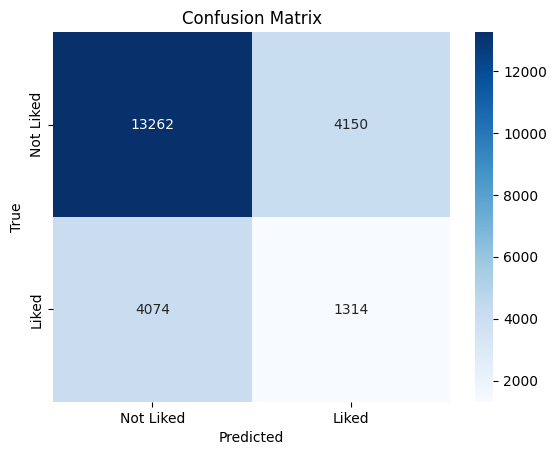

In [45]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Liked', 'Liked'], yticklabels=['Not Liked', 'Liked'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Exercise 3:**The accuracy in the found to be 31 percentage, which is relatively low, but this might be because of the difficulty of the problem. Vice versa of the earlier case. workout and find if different activations and epochs makes the accuracy higher. That will be a fun one!

## Step 6:  Testing the model
This code reshapes a sample song's features from the test set to match the input format required by the LSTM model and then uses the model to predict whether a DJ might play the song based on its features. If the predicted preference is above 0.5, it suggests that the DJ is likely to play a similar song. It also extracts the danceability of the sample song and filters the dataset for songs with similar danceability, within the interquartile range (25th to 75th percentile). If similar songs are found, the code recommends one; otherwise, it informs that no songs with similar danceability are present.


**Exercise 4:**The filtering step can be done any way and each time you get a different answer. Try that as well

In [19]:
# Reshaping the sample song to match the input shape expected by the LSTM model.
sample_song = X_test[0].reshape(1, 1, 4)

# Predicting the preference of the DJ for the sample song.
predicted_preference = model.predict(sample_song)[0][0]

if predicted_preference > 0.5:
    print("The DJ might play a song with similar features")
else:
    print("The DJ might not play a song with similar features")

# Extracting the danceability feature of the sample song.
sample_danceability = sample_song[0][0][0]

lower_bound = df['danceability'].quantile(0.25)
upper_bound = df['danceability'].quantile(0.75)

#Filtering similar songs
similar_songs = df[(df['danceability'] > lower_bound) & (df['danceability'] < upper_bound)]


if len(similar_songs) > 0:
    recommended_song_name = similar_songs['track_name'].values[0]
    print(f"The DJ might play: {recommended_song_name}")
else:
    print("No songs with similar danceability")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
The DJ might not play a song with similar features since the predicted preference is low.
For example, the DJ might play: Comedy


In [20]:
#printing just to make sure the code works
print(similar_songs)

        Unnamed: 0                track_id                    artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV                Gen Hoshino   
4                4  5vjLSffimiIP26QG5WcN2K           Chord Overstreet   
5                5  01MVOl9KtVTNfFiBU9I7dc               Tyrone Wells   
8                8  0IktbUcnAGrvD03AWnz3Q8  Jason Mraz;Colbie Caillat   
10              10  4mzP5mHkRvGxdhdGdAH7EJ               Zack Tabudlo   
...            ...                     ...                        ...   
113992      113992  3FjOBB4EyIXHYUtSgrIdY9              Jesus Culture   
113993      113993  4OkMK49i3NApR1KsAIsTf6               Chris Tomlin   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX              Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs           Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5              Cesária Evora   

                                 album_name                   track_name  \
0                                    Comedy    

#Code of Graphs used in the report

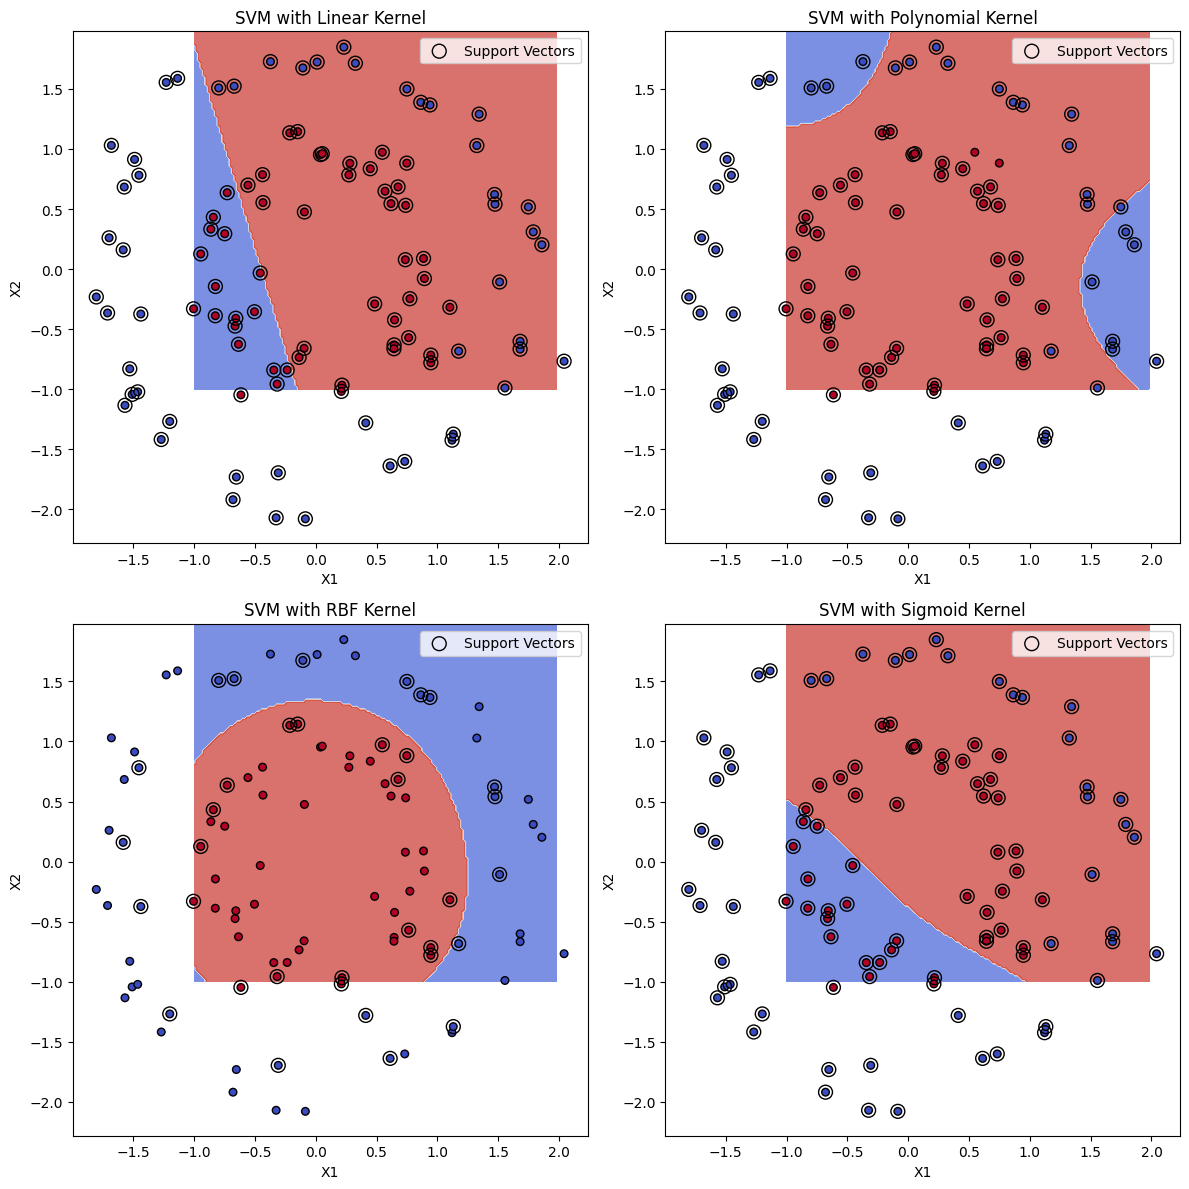

In [28]:
from sklearn.datasets import make_circles

X_2, y = make_circles(n_samples=100, factor=0.5, noise=0.1)

#scaling the parameter
scaler = StandardScaler()
X_2_scaled = scaler.fit_transform(X_2)

#define the functio
def plot_svm_kernel(kernel, X_2, y, C=1.0, gamma='scale', degree=3):
    clf = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)
    clf.fit(X_2, y)

    # Create a mesh grid for plotting the decision boundary
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
    plt.scatter(X_2[:, 0], X_2[:, 1], c=y, s=30, edgecolors='k', cmap=plt.cm.coolwarm)

    # Mark the support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')

    plt.title(f"SVM with {kernel} kernel")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()

# Step 4: Plot for different kernels
plt.figure(figsize=(12, 12))

# List of kernels to plot
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
titles = ['SVM with Linear Kernel', 'SVM with Polynomial Kernel', 'SVM with RBF Kernel', 'SVM with Sigmoid Kernel']


for i, kernel in enumerate(kernels):
    plt.subplot(2, 2, i + 1)  # 2x2 grid (row by column)
    plot_svm_kernel(kernel=kernel, X_2=X_2_scaled, y=y, degree=3 if kernel == 'poly' else 3)
    plt.title(titles[i])

# Save the figure
plt.tight_layout()
plt.savefig("svm_kernels_comparison.png")

#display the plot
plt.show()